In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\COMMAT_classification sc\code\DATASET_ weka_679.csv")

In [3]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,630.0,1.50,0.0,0.25,0.0,0.0,80.0
1,1000.0,1.75,0.0,0.25,0.0,0.0,125.0
2,1500.0,2.50,0.0,0.25,0.0,0.0,175.0
3,1400.0,2.90,0.0,0.25,0.0,0.0,160.0
4,850.0,1.25,0.0,0.25,0.0,0.0,95.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SSA(m2/g)             558 non-null    float64
 1   Pore size(nm)         558 non-null    float64
 2   Pore Volume (cm3/g)   558 non-null    float64
 3   Potential             558 non-null    float64
 4   Nitrogen %            558 non-null    float64
 5   Id/Ig                 558 non-null    float64
 6   Specific Capacitance  558 non-null    float64
dtypes: float64(7)
memory usage: 30.6 KB


In [5]:
df['SSA(m2/g)'] = df['SSA(m2/g)']/1000

In [6]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [7]:
df = df.rename(columns={'SSA(m2/g)': 'SSA','Pore size(nm)': 'PS', 'Pore Volume (cm3/g)': 'PV' , 'Nitrogen %':'NC' ,  'Specific Capacitance':'SC'})

In [8]:
df.head()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [9]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

SSA          441
PS           177
PV           223
Potential     21
NC           129
Id/Ig        113
SC           330
dtype: int64

In [10]:
df.describe()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.166802,1.714821,0.867994,1.296057,1.329385,0.555733,188.130824
std,0.883202,2.616503,0.861877,0.792527,2.875535,0.798127,104.478231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461500,0.000000,0.238000,1.000000,0.000000,0.000000,120.000000
50%,1.016700,0.900000,0.690000,1.000000,0.000000,0.000000,176.500000
75%,1.641000,2.522500,1.295000,1.000000,1.137500,0.997500,247.750000
max,4.073000,27.200000,5.910000,4.000000,19.800000,4.540000,587.000000


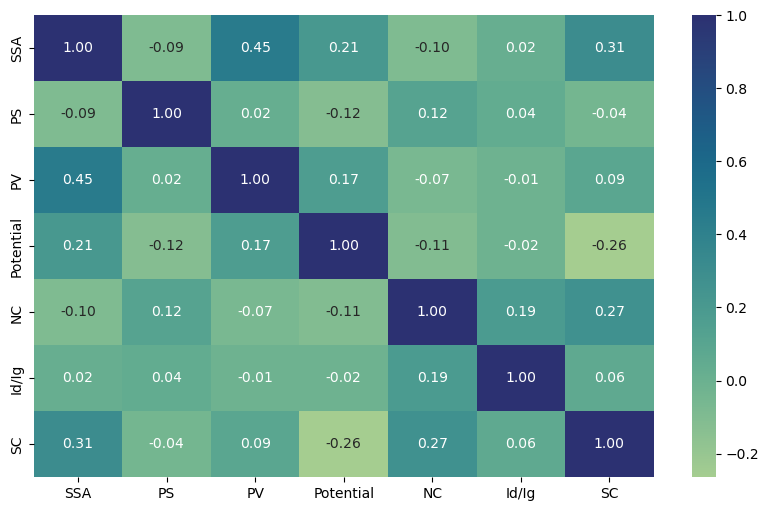

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="crest", fmt=".2f")
#plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
def assign_class(value):
    if value <= 138:
        return 1
    elif value <= 223:
        return 2
    else:
        return 3

df['Output_Class'] = df['SC'].apply(assign_class)
# Check the distribution of output classes
print("\nClass Distribution:")
print(df['Output_Class'].value_counts())


Class Distribution:
Output_Class
1    187
2    186
3    185
Name: count, dtype: int64


In [13]:
# split the data as df1,df2 and df3
df1 = df[df['Output_Class'] == 1]
df2 = df[df['Output_Class'] == 2]
df3 = df[df['Output_Class'] == 3]

In [14]:
#drop specific capacitance column for classification
# Drop column ''
dfop = df.drop(columns=['SC'])
#dfop = df.drop(columns=[df.columns[6]], inplace=True)
dfop.head()

,SSA,PS,PV,Potential,NC,Id/Ig,Output_Class
0,0.63,1.50,0.0,0.25,0.0,0.0,1
1,1.00,1.75,0.0,0.25,0.0,0.0,1
2,1.50,2.50,0.0,0.25,0.0,0.0,2
3,1.40,2.90,0.0,0.25,0.0,0.0,2
4,0.85,1.25,0.0,0.25,0.0,0.0,1


In [15]:
# Check Unique Values for each variable.
for i in dfop.columns:
  print(f"Unique {i}'s count:{dfop[i].nunique()}\n------------------------------------------")
  if i in dfop.columns:
    if(dfop[i].nunique() < 12):
      print(f"\n{dfop[i].unique()}\n------------------------------------------")
     

Unique SSA's count:441
------------------------------------------
Unique PS's count:177
------------------------------------------
Unique PV's count:223
------------------------------------------
Unique Potential's count:21
------------------------------------------
Unique NC's count:129
------------------------------------------
Unique Id/Ig's count:113
------------------------------------------
Unique Output_Class's count:3
------------------------------------------

[1 2 3]
------------------------------------------


In [16]:
import os
print(os.getcwd())  # Shows the current working directory

C:\Users\HP\Desktop\Document\COMMAT\code


In [17]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, accuracy_score 

In [18]:
# To select all columns except the last one for X1, and the last column for y1 for  regression analysis of classes:
Xop = dfop.iloc[:, :-1]  # Select all columns except the last one for features (X1)
yop = dfop.iloc[:, -1]   # Select the last column as the target (y1)

In [19]:
Xop.head()

,SSA,PS,PV,Potential,NC,Id/Ig
0,0.63,1.50,0.0,0.25,0.0,0.0
1,1.00,1.75,0.0,0.25,0.0,0.0
2,1.50,2.50,0.0,0.25,0.0,0.0
3,1.40,2.90,0.0,0.25,0.0,0.0
4,0.85,1.25,0.0,0.25,0.0,0.0


In [20]:
yop.head()

0    1
1    1
2    2
3    2
4    1
Name: Output_Class, dtype: int64

In [22]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split, learning_curve
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xop, yop, test_size=0.2, random_state=42)

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, mean_squared_error, mean_absolute_error,
                             cohen_kappa_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)


# ---------------- AdaBoost Classifier ----------------
# Using Decision Tree as base estimator
base_dt = DecisionTreeClassifier(max_depth=1, random_state=42)  # weak learner
ada_clf = AdaBoostClassifier(
    base_estimator=base_dt,
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)

ada_clf.fit(X_trainc, y_trainc)

# ---------------- Predictions ----------------
y_predc = ada_clf.predict(X_testc)

# ---------------- Error Metrics ----------------
rmse = np.sqrt(mean_squared_error(y_testc, y_predc))
mae = mean_absolute_error(y_testc, y_predc)
kappa = cohen_kappa_score(y_testc, y_predc)
accuracy = accuracy_score(y_testc, y_predc)



# ---------------- Print Results ----------------
print("Performance Analysis (AdaBoost Classifier)")
print("-" * 75)
print(f"Accuracy: {accuracy:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print("-" * 75)
print("Confusion Matrix:")
print(confusion_matrix(y_testc, y_predc))
print("-" * 60)
print("Classification Report:")
print(classification_report(y_testc, y_predc))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Performance Analysis (AdaBoost Classifier)
---------------------------------------------------------------------------
Accuracy: 0.6161
RMSE: 0.6614
MAE: 0.4018
Cohen's Kappa: 0.4202
---------------------------------------------------------------------------
Confusion Matrix:
[[21 12  1]
 [12 23  8]
 [ 1  9 25]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.62      0.62        34
           2       0.52      0.53      0.53        43
           3       0.74      0.71      0.72        35

    accuracy                           0.62       112
   macro avg       0.63      0.62      0.62       112
weighted avg       0.62      0.62      0.62       112



In [24]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, mean_squared_error, mean_absolute_error,
                             cohen_kappa_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             make_scorer)
from scipy.stats import randint, uniform


# ---------------- Base Estimator ----------------
base_dt = DecisionTreeClassifier(random_state=42)

# ---------------- AdaBoost Classifier ----------------
ada_clf = AdaBoostClassifier(base_estimator=base_dt, random_state=42)

# ---------------- Hyperparameter Distribution ----------------
param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.5),
    'base_estimator__max_depth': randint(1, 5)  # tuning depth of weak learners
}

# ---------------- Define Kappa Scorer ----------------
kappa_scorer = make_scorer(cohen_kappa_score)

# ---------------- Randomized Search CV (cv=10) ----------------
random_search = RandomizedSearchCV(
    estimator=ada_clf,
    param_distributions=param_dist,
    n_iter=30,               # number of random configs to try
    scoring=kappa_scorer,    # optimize for Kappa
    cv=10,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X_trainc, y_trainc)

# ---------------- Best Model ----------------
best_ada = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# ---------------- Predictions ----------------
y_predc = best_ada.predict(X_testc)

# ---------------- Error Metrics ----------------
rmse = np.sqrt(mean_squared_error(y_testc, y_predc))
mae = mean_absolute_error(y_testc, y_predc)
kappa = cohen_kappa_score(y_testc, y_predc)
accuracy = accuracy_score(y_testc, y_predc)

# ---------------- Print Results ----------------
print("\nPerformance Analysis (AdaBoost Classifier with Randomized Search CV - 10 fold)")
# ---------------- Print Results ----------------
print("Performance Analysis (AdaBoost Classifier)")
print("-" * 75)
print(f"Accuracy: {accuracy:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print("-" * 75)
print("Confusion Matrix:")
print(confusion_matrix(y_testc, y_predc))
print("-" * 60)
print("Classification Report:")
print(classification_report(y_testc, y_predc))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Hyperparameters: {'base_estimator__max_depth': 1, 'learning_rate': 0.15561457009902097, 'n_estimators': 108}

Performance Analysis (AdaBoost Classifier with Randomized Search CV - 10 fold)
Performance Analysis (AdaBoost Classifier)
---------------------------------------------------------------------------
Accuracy: 0.6071
RMSE: 0.6879
MAE: 0.4196
Cohen's Kappa: 0.4079
---------------------------------------------------------------------------
Confusion Matrix:
[[21 11  2]
 [13 22  8]
 [ 1  9 25]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.62      0.61        34
           2       0.52      0.51      0.52        43
           3       0.71      0.71      0.71        35

    accuracy                           0.61       112
   macro avg       0.61      0.61      0.61       112
weighted avg       0.61      0.61      0.61       112

